# Hausarbeit im Modul „Data Science und Machine Learning“ WS22/23 - Teil 3
## The shopping data set

Tasks
1. Cluster the existing data based on appropriate procedures. Justify how you would cluster the data set based on the results.
2. Describe the clusters found based on the characteristics of the attributes of the customers and the cluster size.
3. What recommendation could you give the marketing department based on your analysis?

Marketing
E.g., Companies have access to a large number of measurements

− median household income,
− occupation,
− distance from the nearest urban area,
− technology affinity, ….

Clustering helps marketers discover distinct groups in their customer bases and use this knowledge to develop targeted marketingprograms

Choosing the number of clusters requires a delicate balance.

Setting the k to be very large will improve the homogeneity of the clusters.

At the same time, it risks overfitting the data.

Guessing the number of clusters

Ideally, you will have some a priori knowledge (that is, a prior belief) about the true groupings, and you can begin applyingk-Means using this information.

We will deal with this issue in a later chapter (Finding the right number of clusters)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [77]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans




# Common imports
import pandas as pd
import numpy as np
import os
import seaborn as sns


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "06_Clustering_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tasks 1 - Cluster the existing data based on appropriate procedures. Justify how you would cluster the data set based on the results.

Going for K-means clustering
General procedure/approach
1. Data Preparation
    1. removing any missing values
    1. Removing outliers 
1. Feature selection
1. Feature-Engineering 
1. Daten skalieren
1. Clustering k-means

## 1.1 Data preparation

In [51]:
##Import data
customer = pd.read_csv("https://raw.githubusercontent.com/Ph1lippK/VAWI/master/Data/03_Retail_Clustering.csv", sep = ';')

customer.head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
0        1957  Graduation         Single           58138.0         0   
1        1954  Graduation         Single           46344.0         1   
2        1965  Graduation       Together           71613.0         0   
3        1984  Graduation       Together           26646.0         1   
4        1981         PhD        Married           58293.0         1   

   Teen_home Registration_date  Recency  Exist_Complain  MntWines  MntFruits  \
0          0        04.09.2020       58               0       635         88   
1          1        08.03.2022       38               0        11          1   
2          0        21.08.2021       26               0       426         49   
3          0        10.02.2022       26               0        11          4   
4          0        19.01.2022       94               0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                  3                8                   10                  4  
1                  2                1                    1                  2  
2                  1                8                    2                 10  
3                  2                2                    0                  4  
4                  5                5                    3                  6

In [52]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Estimated_Income     2216 non-null   float64
 4   Kid_home             2240 non-null   int64  
 5   Teen_home            2240 non-null   int64  
 6   Registration_date    2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   Exist_Complain       2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [53]:
##Check for missing values
#print(customer1.isna().sum()) # Check the number of missing values in each column
##dropping missing values
customer_dropped = customer.dropna()
print(customer_dropped.isna().sum()) # Check the number of missing values in each column

Year_Birth             0
Education              0
Marital_Status         0
Estimated_Income       0
Kid_home               0
Teen_home              0
Registration_date      0
Recency                0
Exist_Complain         0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64


In [54]:
customer_dropped.head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
0        1957  Graduation         Single           58138.0         0   
1        1954  Graduation         Single           46344.0         1   
2        1965  Graduation       Together           71613.0         0   
3        1984  Graduation       Together           26646.0         1   
4        1981         PhD        Married           58293.0         1   

   Teen_home Registration_date  Recency  Exist_Complain  MntWines  MntFruits  \
0          0        04.09.2020       58               0       635         88   
1          1        08.03.2022       38               0        11          1   
2          0        21.08.2021       26               0       426         49   
3          0        10.02.2022       26               0        11          4   
4          0        19.01.2022       94               0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                  3                8                   10                  4  
1                  2                1                    1                  2  
2                  1                8                    2                 10  
3                  2                2                    0                  4  
4                  5                5                    3                  6

In [55]:
# Show all unique entries in the 'Education' column
unique_kid = customer_dropped['Kid_home'].unique()
print(unique_kid)
unique_teen = customer_dropped['Teen_home'].unique()
print(unique_teen)
unique_complain = customer_dropped['Exist_Complain'].unique()
print(unique_complain)

unique_education = customer_dropped['Education'].unique()
print(unique_education)
unique_marital = customer_dropped['Marital_Status'].unique()
print(unique_marital)

[0 1 2]
[0 1 2]
[0 1]
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


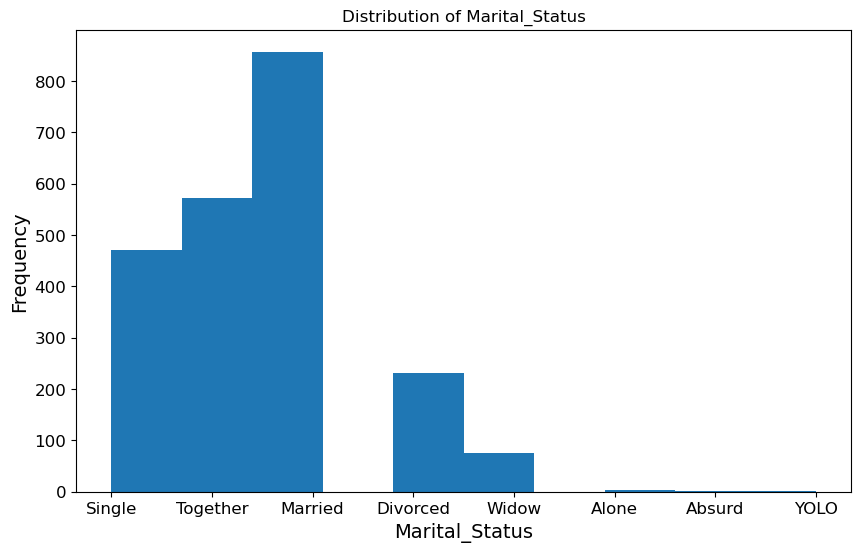

In [56]:
# marital status looks odd
# Show the distribution of values in a column
Marital_Status = 'Marital_Status'
plt.figure(figsize=(10, 6))
plt.hist(customer_dropped[Marital_Status], bins=10)
plt.title(f'Distribution of {Marital_Status}')
plt.xlabel(Marital_Status)
plt.ylabel('Frequency')
plt.show()

In [57]:
# create dataframe to check for entries of marital status
sum_marital = customer_dropped[['Year_Birth','Marital_Status']]
# Sum the values of a column grouped by unique entries
sum_by_marital = sum_marital.groupby('Marital_Status').count()
sum_by_marital


Year_Birth
Marital_Status            
Absurd                   2
Alone                    3
Divorced               232
Married                857
Single                 471
Together               573
Widow                   76
YOLO                     2

Yolo, absurd and alone look like fun entries in this record and since they sum up to only 7 entries I will exclude those

In [58]:
customer_dropped.head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
0        1957  Graduation         Single           58138.0         0   
1        1954  Graduation         Single           46344.0         1   
2        1965  Graduation       Together           71613.0         0   
3        1984  Graduation       Together           26646.0         1   
4        1981         PhD        Married           58293.0         1   

   Teen_home Registration_date  Recency  Exist_Complain  MntWines  MntFruits  \
0          0        04.09.2020       58               0       635         88   
1          1        08.03.2022       38               0        11          1   
2          0        21.08.2021       26               0       426         49   
3          0        10.02.2022       26               0        11          4   
4          0        19.01.2022       94               0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                  3                8                   10                  4  
1                  2                1                    1                  2  
2                  1                8                    2                 10  
3                  2                2                    0                  4  
4                  5                5                    3                  6

In [59]:
# Define the values to drop
values_to_drop = ['Absurd','Alone','YOLO']

# Drop rows where 'Marital_Status' is any value in 'values_to_drop'
customer_clean = customer_dropped.drop(customer_dropped[customer_dropped['Marital_Status'].isin(values_to_drop)].index)
customer_clean.head()


Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
0        1957  Graduation         Single           58138.0         0   
1        1954  Graduation         Single           46344.0         1   
2        1965  Graduation       Together           71613.0         0   
3        1984  Graduation       Together           26646.0         1   
4        1981         PhD        Married           58293.0         1   

   Teen_home Registration_date  Recency  Exist_Complain  MntWines  MntFruits  \
0          0        04.09.2020       58               0       635         88   
1          1        08.03.2022       38               0        11          1   
2          0        21.08.2021       26               0       426         49   
3          0        10.02.2022       26               0        11          4   
4          0        19.01.2022       94               0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                  3                8                   10                  4  
1                  2                1                    1                  2  
2                  1                8                    2                 10  
3                  2                2                    0                  4  
4                  5                5                    3                  6

In [60]:
# Persist the dataset customer_clean for later use, since Im removing outliners
## but dropping 'kid_home', 'teen_home' and 'Exist_Complain" columns, which I want to add after removing the outliners
customer_clean_persistent = customer_clean
customer_clean_persistent.head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
0        1957  Graduation         Single           58138.0         0   
1        1954  Graduation         Single           46344.0         1   
2        1965  Graduation       Together           71613.0         0   
3        1984  Graduation       Together           26646.0         1   
4        1981         PhD        Married           58293.0         1   

   Teen_home Registration_date  Recency  Exist_Complain  MntWines  MntFruits  \
0          0        04.09.2020       58               0       635         88   
1          1        08.03.2022       38               0        11          1   
2          0        21.08.2021       26               0       426         49   
3          0        10.02.2022       26               0        11          4   
4          0        19.01.2022       94               0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                  3                8                   10                  4  
1                  2                1                    1                  2  
2                  1                8                    2                 10  
3                  2                2                    0                  4  
4                  5                5                    3                  6

## Removing outliers

In [61]:
# Drop 'kid_home', 'teen_home' and 'Exist_Complain" columns from customer_clean
customer_clean = customer_clean.drop(['Kid_home', 'Teen_home','Exist_Complain'], axis=1)

## First went for the first and third quartiles (Q1 and Q3) but I removed to many outliers, thus I reduced the percentage
# still using Q1 and Q3 variables though
Q1 = customer_clean.quantile(0.15)
Q3 = customer_clean.quantile(0.85)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and remove them from the DataFrame
customer_outliers = customer_clean[~((customer_clean < lower_bound) | (customer_clean > upper_bound)).any(axis=1)]
# Print the number of outliers removed
print("Number of outliers removed:", len(customer_clean) - len(customer_outliers))


Number of outliers removed: 179


C:\Users\pknuhman\AppData\Local\Temp\ipykernel_37336\2168925729.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  customer_outliers = customer_clean[~((customer_clean < lower_bound) | (customer_clean > upper_bound)).any(axis=1)]


In [62]:
# Add the 'Kid_home', 'Teen_home' and 'Exists_Complain'columns back to the DataFrame
customer_prepared = customer_outliers.join(customer_clean_persistent[['Kid_home', 'Teen_home','Exist_Complain']])
customer_prepared.head()

Year_Birth   Education Marital_Status  Estimated_Income Registration_date  \
0        1957  Graduation         Single           58138.0        04.09.2020   
1        1954  Graduation         Single           46344.0        08.03.2022   
2        1965  Graduation       Together           71613.0        21.08.2021   
3        1984  Graduation       Together           26646.0        10.02.2022   
4        1981         PhD        Married           58293.0        19.01.2022   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  Kid_home  Teen_home  Exist_Complain  
0                   10                  4         0          0               0  
1                    1                  2         1          1               0  
2                    2                 10         0          0               0  
3                    0                  4         1          0               0  
4                    3                  6         1          0               0

In [63]:
customer_prepared.head()

Year_Birth   Education Marital_Status  Estimated_Income Registration_date  \
0        1957  Graduation         Single           58138.0        04.09.2020   
1        1954  Graduation         Single           46344.0        08.03.2022   
2        1965  Graduation       Together           71613.0        21.08.2021   
3        1984  Graduation       Together           26646.0        10.02.2022   
4        1981         PhD        Married           58293.0        19.01.2022   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  Kid_home  Teen_home  Exist_Complain  
0                   10                  4         0          0               0  
1                    1                  2         1          1               0  
2                    2                 10         0          0               0  
3                    0                  4         1          0               0  
4                    3                  6         1          0               0

## 1.2 Feature selection

Select features that are likely to be good predictors of customer behavior, such as demographics, purchase history, and customer engagement. Drop irrelevant columns

### Useful features

1. Demographic variables (can be useful for segmenting customers based on their demographics and socio-economic status):
 1. Year_of_Birth
 1. Education
 1. Marital_Status
 1. Estimated_Income

1. Purchase history variables (can be useful for segmenting customers based on their purchase behavior and preferences):
 1. MntWines
 1. MntFruits
 1. MntMeatProducts
 1. MntFishProducts
 1. MntSweetProducts
 1. MntGoldProds 

1. Engagement variables (can be useful for segmenting customers based on their level of engagement with the retailer and their purchase channel):
 1. Registration_date
 1. Recency
 1. Exist_Complain
 1. No._WebPurchases
 1. No._CatalogPurchases
 1. No._StorePurchases 

1. Household variables (can be useful for segmenting customers based on their household composition):  
 1. Kids_home
 1. Teen_home 

### irrelevant features to drop
1. Registration date
1. NumDealsPurchases (due to question in forum, column shouldnt be in the dataset)

In [64]:
customer_prepared.head()

Year_Birth   Education Marital_Status  Estimated_Income Registration_date  \
0        1957  Graduation         Single           58138.0        04.09.2020   
1        1954  Graduation         Single           46344.0        08.03.2022   
2        1965  Graduation       Together           71613.0        21.08.2021   
3        1984  Graduation       Together           26646.0        10.02.2022   
4        1981         PhD        Married           58293.0        19.01.2022   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  Kid_home  Teen_home  Exist_Complain  
0                   10                  4         0          0               0  
1                    1                  2         1          1               0  
2                    2                 10         0          0               0  
3                    0                  4         1          0               0  
4                    3                  6         1          0               0

In [65]:
customer_selected = customer_prepared.drop(['Registration_date','NumDealsPurchases'], axis=1)
customer_selected.head()

Year_Birth   Education Marital_Status  Estimated_Income  Recency  MntWines  \
0        1957  Graduation         Single           58138.0       58       635   
1        1954  Graduation         Single           46344.0       38        11   
2        1965  Graduation       Together           71613.0       26       426   
3        1984  Graduation       Together           26646.0       26        11   
4        1981         PhD        Married           58293.0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            88                8                   10                  4   
1             6                1                    1                  2   
2            42                8                    2                 10   
3             5                2                    0                  4   
4            15                5                    3                  6   

   Kid_home  Teen_home  Exist_Complain  
0         0          0               0  
1         1          1               0  
2         0          0               0  
3         1          0               0  
4         1          0               0

## 1.3 Feature Engineering

1. Age: The Year_of_Birth variable can be used to create a new variable for age, which may be a more relevant variable for segmentation.

1. Total Revenue: Instead of analyzing each category of revenue (e.g. wine, meat, fish), a new variable can be created that represents the total amount spent by each customer across all categories.

1. Total Purchases: Instead of analyzing each number of purchases made on a different channel (e.g. Web, catalog, store), a new variable can be created that represents the total number of purchases by each customer across all channels.

1. Channel Engagement: A new variable can be created that represents the total number of purchases made by each customer across all channels (web, catalog, store). Additionally, the proportion of purchases made through each channel can be calculated.

1. Children: A new variable can be created to represent the total number of children (Kids_home + Teen_home) in each household.

1. Complaint History: The Exist_Complain variable can be used to create a new variable that represents the number of complaints filed by each customer in the last year.


1. Spending Behavior: The ratio of spending on each category (e.g., wine, meat, fish) to the total spending can be calculated to identify customers with different spending behaviors.


In [66]:
customer_selected.head()

Year_Birth   Education Marital_Status  Estimated_Income  Recency  MntWines  \
0        1957  Graduation         Single           58138.0       58       635   
1        1954  Graduation         Single           46344.0       38        11   
2        1965  Graduation       Together           71613.0       26       426   
3        1984  Graduation       Together           26646.0       26        11   
4        1981         PhD        Married           58293.0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            88                8                   10                  4   
1             6                1                    1                  2   
2            42                8                    2                 10   
3             5                2                    0                  4   
4            15                5                    3                  6   

   Kid_home  Teen_home  Exist_Complain  
0         0          0               0  
1         1          1               0  
2         0          0               0  
3         1          0               0  
4         1          0               0

In [67]:
# Feature engineering for age
customer_selected['Age'] = 2023 - customer_selected['Year_Birth']

# Feature engineering for total revenue
customer_selected['TotalRevenue'] = customer_selected['MntWines'] + customer_selected['MntFruits'] + customer_selected['MntMeatProducts'] + customer_selected['MntFishProducts'] + customer_selected['MntSweetProducts'] + customer_selected['MntGoldProds']

# Feature engineering for total purchases
customer_selected['TotalPurchases'] = customer_selected['NumWebPurchases'] + customer_selected['NumCatalogPurchases'] + customer_selected['NumStorePurchases']


# Feature engineering for channel engagement
customer_selected['WebEngagement'] = customer_selected['NumWebPurchases'] / customer_selected['TotalPurchases']
customer_selected['CatalogEngagement'] = customer_selected['NumCatalogPurchases'] / customer_selected['TotalPurchases']
customer_selected['StoreEngagement'] = customer_selected['NumStorePurchases'] / customer_selected['TotalPurchases']

# Feature engineering for household composition
customer_selected['TotalChildren'] = customer_selected['Kid_home'] + customer_selected['Teen_home']

# Feature engineering for complaint history
customer_selected['ComplaintsLastYear'] = customer_selected['Exist_Complain']

# Feature engineering for purchase recency and frequency
##customer_selected['PurchaseRecency'] = customer_selected['Recency']
##customer_selected['PurchaseFrequency'] = customer_selected['NumWebPurchases'] + customer_selected['NumCatalogPurchases'] + customer_selected['NumStorePurchases']

# Feature engineering for spending behavior
customer_selected['WineRatio'] = customer_selected['MntWines'] / customer_selected['TotalRevenue']
customer_selected['MeatRatio'] = customer_selected['MntMeatProducts'] / customer_selected['TotalRevenue']
customer_selected['FishRatio'] = customer_selected['MntFishProducts'] / customer_selected['TotalRevenue']

# Remove the original variables that have been transformed or are no longer needed
customer_selected = customer_selected.drop(['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Kid_home', 'Teen_home', 'Exist_Complain'], axis=1)

customer_selected.head()


Education Marital_Status  Estimated_Income  Recency  Age  TotalRevenue  \
0  Graduation         Single           58138.0       58   66          1617   
1  Graduation         Single           46344.0       38   69            27   
2  Graduation       Together           71613.0       26   58           776   
3  Graduation       Together           26646.0       26   39            53   
4         PhD        Married           58293.0       94   42           422   

   TotalPurchases  WebEngagement  CatalogEngagement  StoreEngagement  \
0              22       0.363636           0.454545         0.181818   
1               4       0.250000           0.250000         0.500000   
2              20       0.400000           0.100000         0.500000   
3               6       0.333333           0.000000         0.666667   
4              14       0.357143           0.214286         0.428571   

   TotalChildren  ComplaintsLastYear  WineRatio  MeatRatio  FishRatio  
0              0                   0   0.392703   0.337662   0.106370  
1              2                   0   0.407407   0.222222   0.074074  
2              0                   0   0.548969   0.163660   0.143041  
3              1                   0   0.207547   0.377358   0.188679  
4              1                   0   0.409953   0.279621   0.109005

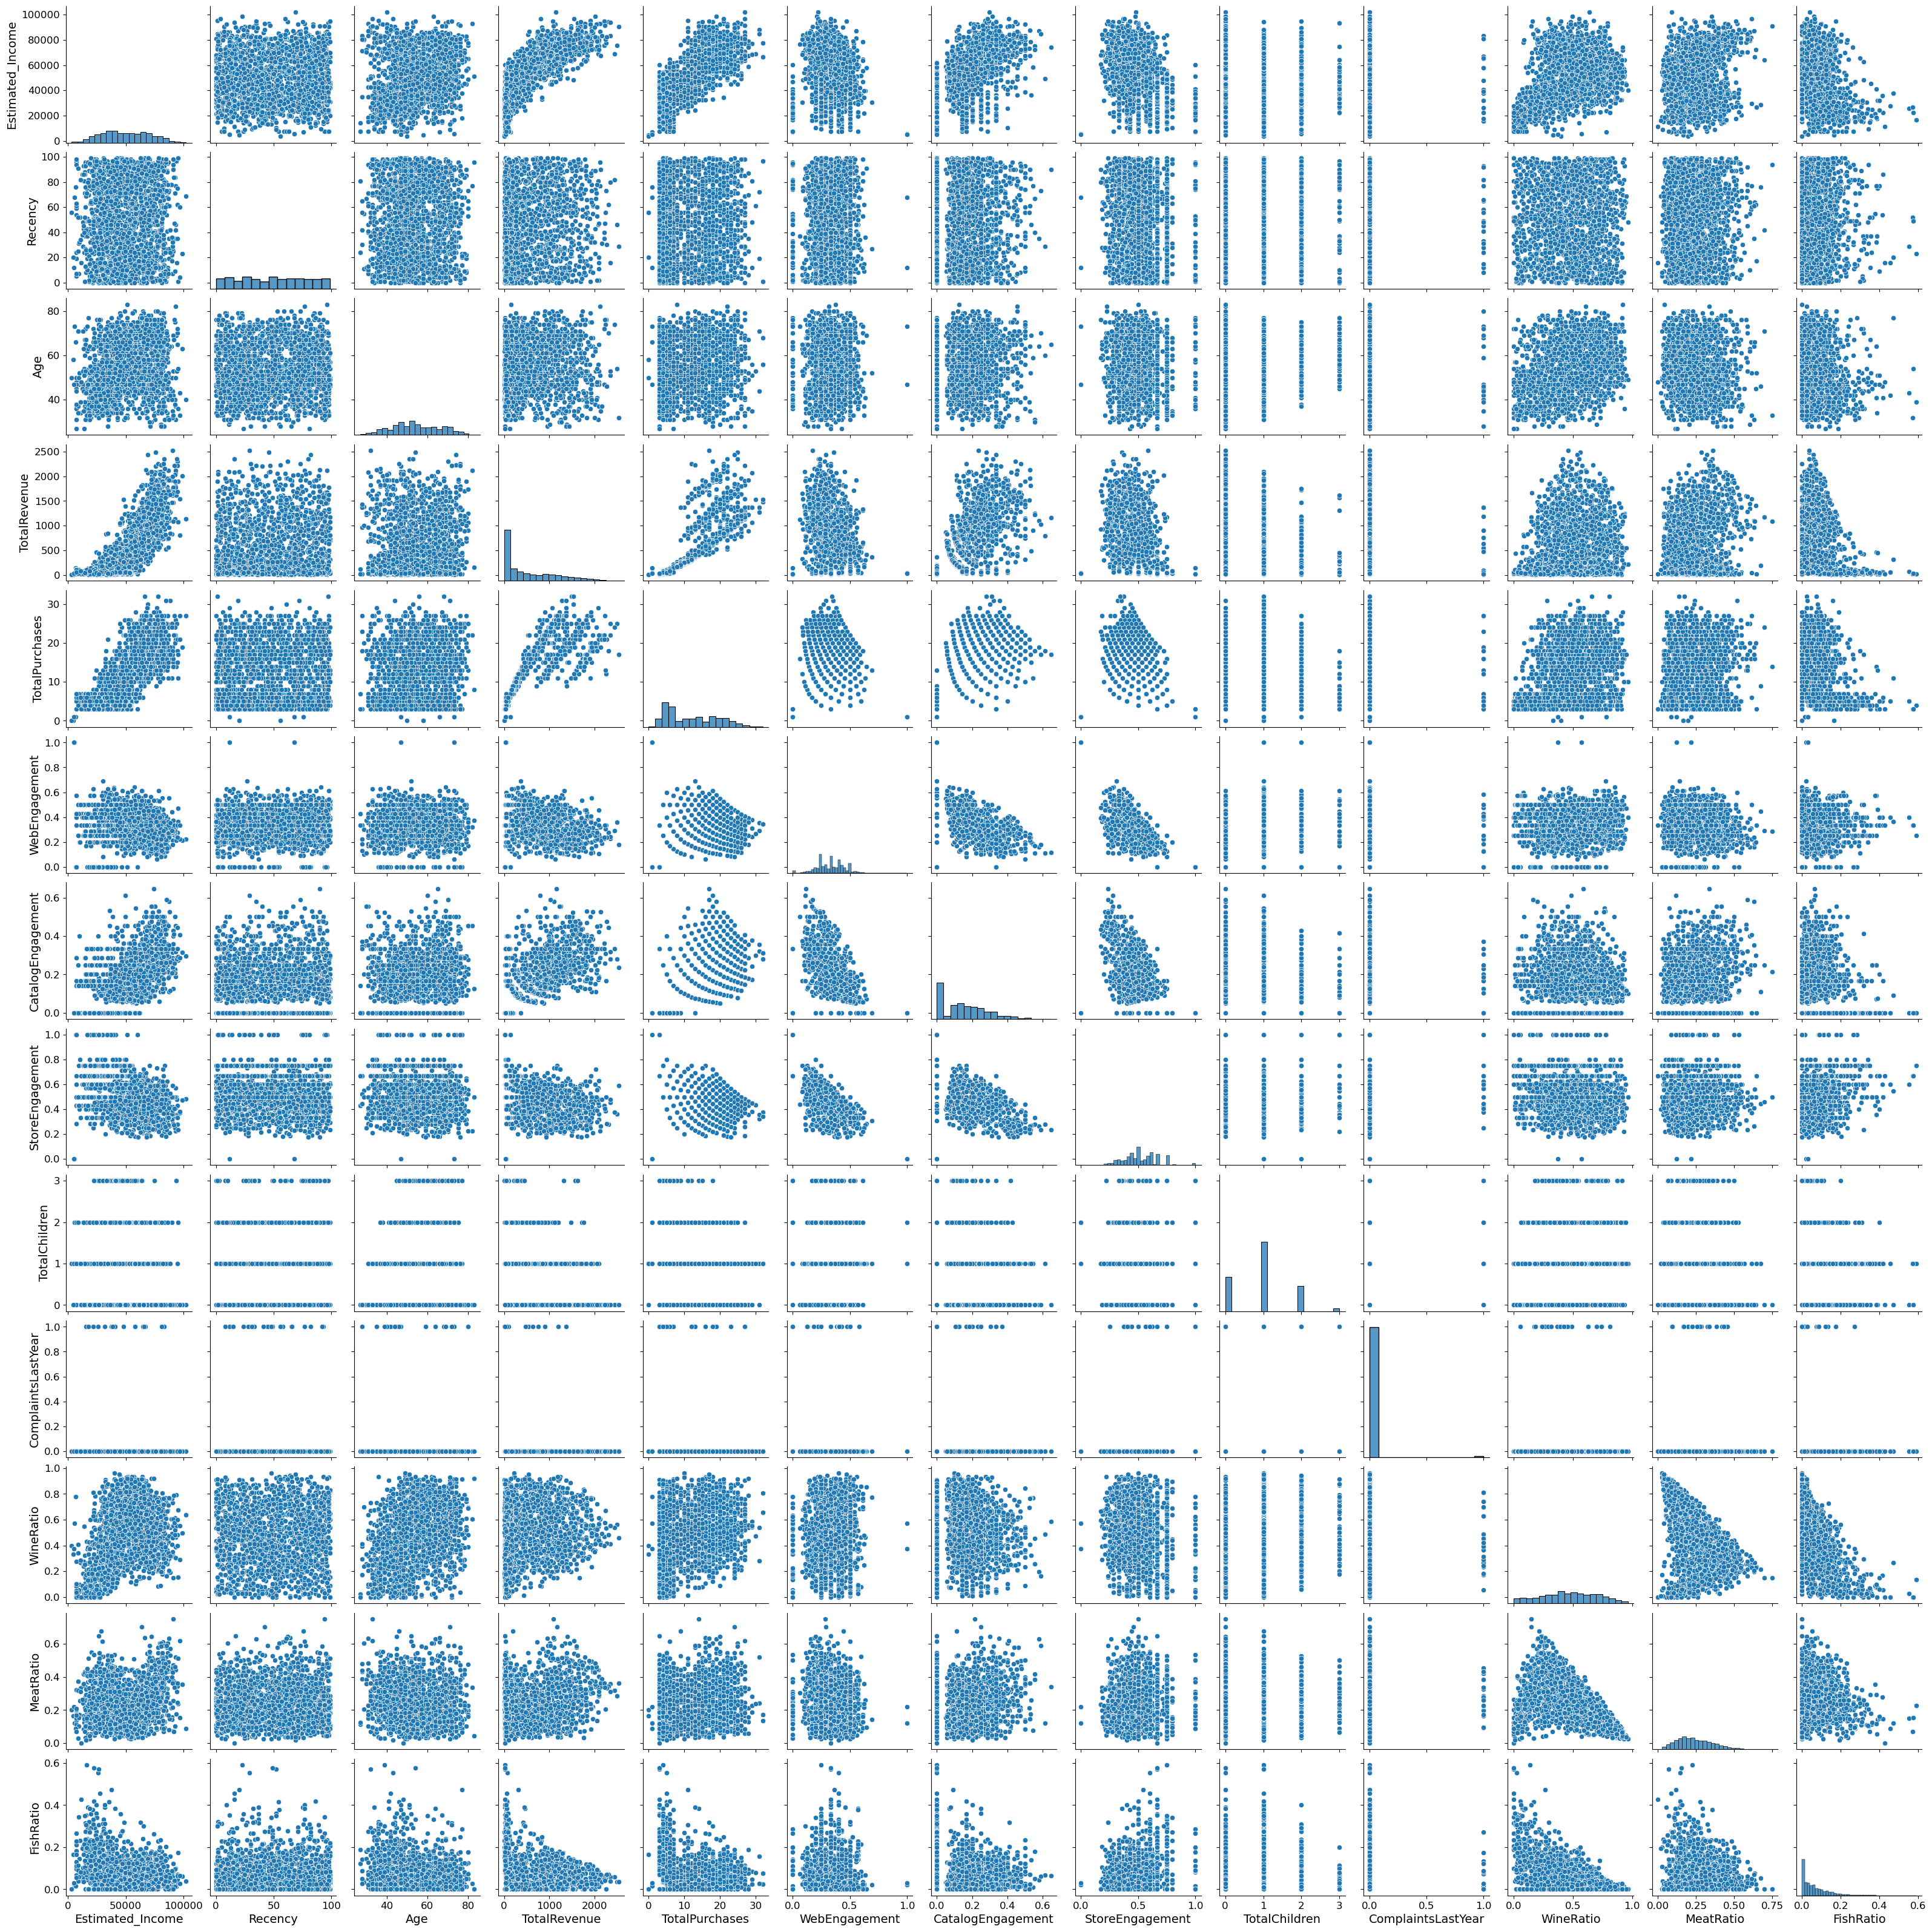

In [78]:
sns.pairplot(customer_selected)

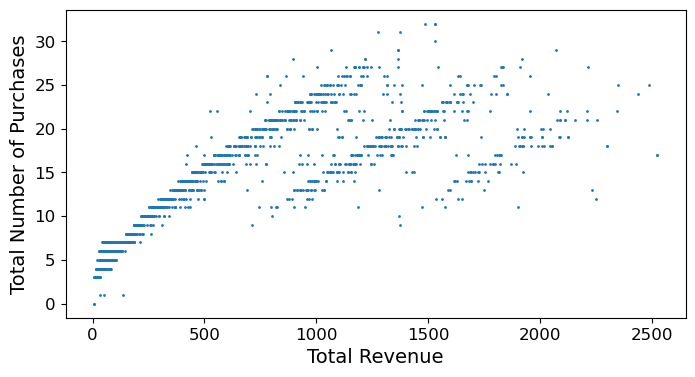

In [68]:
plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["TotalPurchases"], s=1) #make marker size smaller
plt.xlabel("Total Revenue", fontsize=14)
plt.ylabel("Total Number of Purchases", fontsize=14)
plt.show()

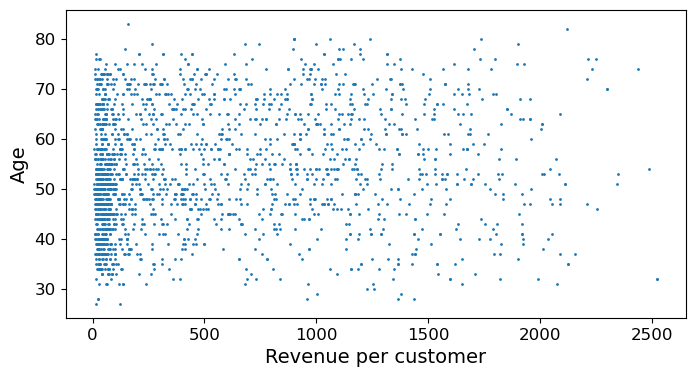

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["Age"], s=1) #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

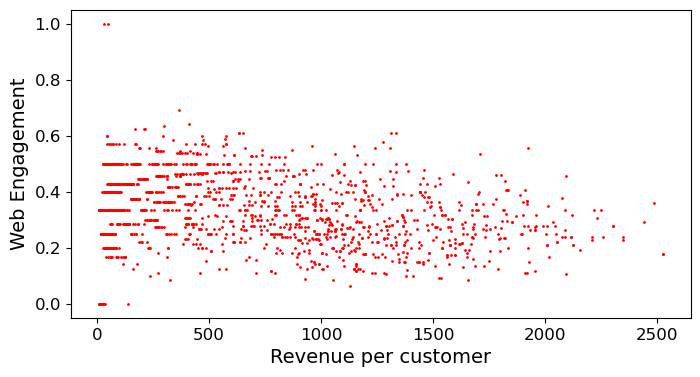

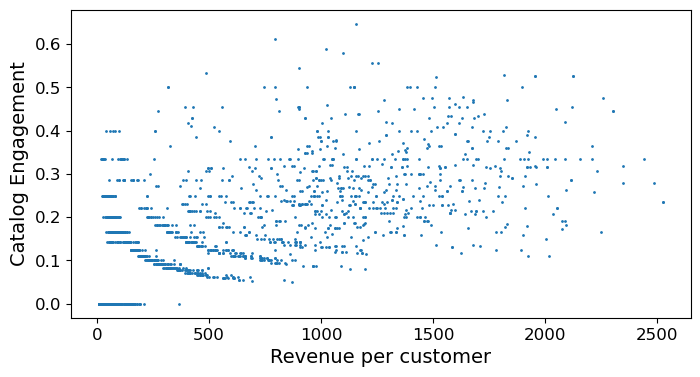

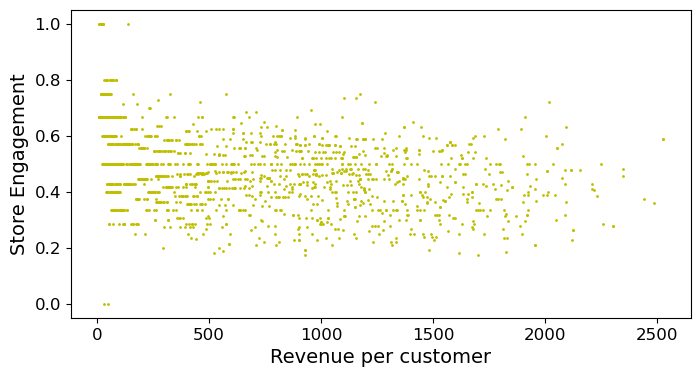

In [21]:
plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["WebEngagement"], s=1,color='r') #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Web Engagement", fontsize=14)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["CatalogEngagement"], s=1) #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Catalog Engagement", fontsize=14)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["StoreEngagement"], s=1,color='y') #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Store Engagement", fontsize=14)
plt.show()

## 1.4 Normalization
Since the variables used in clustering analysis can have different scales, it is important to normalize the variables. You can use Min-Max normalization, Standardization or log transformation depending on the distribution of the data.

In [22]:
# Persist the dataset customer_selected for later use
customer_selected_persistent = customer_selected
customer_selected_persistent.head()

Education Marital_Status  Estimated_Income  Recency  Age  TotalRevenue  \
0  Graduation         Single           58138.0       58   66          1617   
1  Graduation         Single           46344.0       38   69            27   
2  Graduation       Together           71613.0       26   58           776   
3  Graduation       Together           26646.0       26   39            53   
4         PhD        Married           58293.0       94   42           422   

   TotalPurchases  WebEngagement  CatalogEngagement  StoreEngagement  \
0              22       0.363636           0.454545         0.181818   
1               4       0.250000           0.250000         0.500000   
2              20       0.400000           0.100000         0.500000   
3               6       0.333333           0.000000         0.666667   
4              14       0.357143           0.214286         0.428571   

   TotalChildren  ComplaintsLastYear  WineRatio  MeatRatio  FishRatio  
0              0                   0   0.392703   0.337662   0.106370  
1              2                   0   0.407407   0.222222   0.074074  
2              0                   0   0.548969   0.163660   0.143041  
3              1                   0   0.207547   0.377358   0.188679  
4              1                   0   0.409953   0.279621   0.109005

In [23]:
# Define the numeric columns to be normalized
numeric_columns = ['Estimated_Income', 'Recency', 'Age', 'TotalRevenue', 'TotalPurchases',
                   'WebEngagement', 'CatalogEngagement', 'StoreEngagement', 'TotalChildren',
                   'ComplaintsLastYear', 'WineRatio', 'MeatRatio', 'FishRatio']

# Create a StandardScaler object and apply it to the numeric columns
scaler = StandardScaler()
##customer_selected[numeric_columns] = scaler.fit_transform(customer_selected[numeric_columns])
customer_normalized = customer_selected
customer_normalized[numeric_columns] = scaler.fit_transform(customer_normalized[numeric_columns])

# Print the first few rows of the normalized DataFrame to ensure everything looks correct
customer_normalized.head()


Education Marital_Status  Estimated_Income   Recency       Age  \
0  Graduation         Single          0.399837  0.300110  1.025438   
1  Graduation         Single         -0.186254 -0.393253  1.282801   
2  Graduation       Together          1.069464 -0.809271  0.339136   
3  Graduation       Together         -1.165126 -0.809271 -1.290831   
4         PhD        Married          0.407540  1.548163 -1.033468   

   TotalRevenue  TotalPurchases  WebEngagement  CatalogEngagement  \
0      1.846854        1.401274       0.266563           2.280647   
1     -0.910234       -1.133757      -0.700790           0.725814   
2      0.388546        1.119604       0.576115          -0.414396   
3     -0.865149       -0.852087       0.008602          -1.174537   
4     -0.225297        0.274594       0.211285           0.454336   

   StoreEngagement  TotalChildren  ComplaintsLastYear  WineRatio  MeatRatio  \
0        -2.254659      -1.328439           -0.099751  -0.316311   0.762092   
1        -0.089558       1.385935           -0.099751  -0.252584  -0.191559   
2        -0.089558      -1.328439           -0.099751   0.360910  -0.675343   
3         1.044543       0.028748           -0.099751  -1.118729   1.090022   
4        -0.575601       0.028748           -0.099751  -0.241554   0.282611   

   FishRatio  
0   0.458316  
1   0.048311  
2   0.923872  
3   1.503262  
4   0.491767

In [24]:
unique_marital = customer_normalized['Marital_Status'].unique()
print(unique_marital)

['Single' 'Together' 'Married' 'Divorced' 'Widow']


### converting education and marital_status to dummy variables

In [25]:
# Convert 'Education' and 'Marital_Status' columns to dummy variables
customer_dummies = pd.get_dummies(customer_normalized, columns=['Education', 'Marital_Status'])
customer_dummies.head()


Estimated_Income   Recency       Age  TotalRevenue  TotalPurchases  \
0          0.399837  0.300110  1.025438      1.846854        1.401274   
1         -0.186254 -0.393253  1.282801     -0.910234       -1.133757   
2          1.069464 -0.809271  0.339136      0.388546        1.119604   
3         -1.165126 -0.809271 -1.290831     -0.865149       -0.852087   
4          0.407540  1.548163 -1.033468     -0.225297        0.274594   

   WebEngagement  CatalogEngagement  StoreEngagement  TotalChildren  \
0       0.266563           2.280647        -2.254659      -1.328439   
1      -0.700790           0.725814        -0.089558       1.385935   
2       0.576115          -0.414396        -0.089558      -1.328439   
3       0.008602          -1.174537         1.044543       0.028748   
4       0.211285           0.454336        -0.575601       0.028748   

   ComplaintsLastYear  ...  Education_2n Cycle  Education_Basic  \
0           -0.099751  ...                   0                0   
1           -0.099751  ...                   0                0   
2           -0.099751  ...                   0                0   
3           -0.099751  ...                   0                0   
4           -0.099751  ...                   0                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  
0                        0                     0  
1                        0                     0  
2                        1                     0  
3                        1                     0  
4                        0                     0  

[5 rows x 23 columns]

In [26]:
customer_dummies.describe()

Estimated_Income       Recency           Age  TotalRevenue  \
count      2.030000e+03  2.030000e+03  2.030000e+03  2.030000e+03   
mean      -9.871687e-18 -2.093837e-16  2.318889e-16 -7.109803e-19   
std        1.000246e+00  1.000246e+00  1.000246e+00  1.000246e+00   
min       -2.315244e+00 -1.710643e+00 -2.320284e+00 -9.483821e-01   
25%       -7.834018e-01 -8.786070e-01 -6.903167e-01 -8.460751e-01   
50%       -4.750820e-02  2.276485e-02 -8.980244e-02 -4.177727e-01   
75%        7.904196e-01  8.548004e-01  7.680750e-01  7.141074e-01   
max        2.578025e+00  1.721504e+00  2.483830e+00  3.421343e+00   

       TotalPurchases  WebEngagement  CatalogEngagement  StoreEngagement  \
count    2.030000e+03   2.028000e+03       2.028000e+03     2.028000e+03   
mean     1.161085e-16   3.525560e-17       1.603336e-16     7.815562e-16   
std      1.000246e+00   1.000247e+00       1.000247e+00     1.000247e+00   
min     -1.697097e+00  -2.828966e+00      -1.174537e+00    -3.491859e+00   
25%     -8.520867e-01  -7.007902e-01      -1.174537e+00    -6.566081e-01   
50%     -1.479115e-01   8.601818e-03      -8.862186e-02    -8.955793e-02   
75%      8.379338e-01   5.761154e-01       7.258143e-01     5.909023e-01   
max      2.809624e+00   5.683738e+00       3.744019e+00     3.312743e+00   

       TotalChildren  ComplaintsLastYear  ...  Education_2n Cycle  \
count   2.030000e+03        2.030000e+03  ...         2030.000000   
mean    6.333193e-17       -3.934319e-16  ...            0.088670   
std     1.000246e+00        1.000246e+00  ...            0.284337   
min    -1.328439e+00       -9.975093e-02  ...            0.000000   
25%    -1.328439e+00       -9.975093e-02  ...            0.000000   
50%     2.874829e-02       -9.975093e-02  ...            0.000000   
75%     2.874829e-02       -9.975093e-02  ...            0.000000   
max     2.743122e+00        1.002497e+01  ...            1.000000   

       Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
count      2030.000000           2030.000000       2030.000000    2030.000000   
mean          0.026601              0.491133          0.170443       0.223153   
std           0.160954              0.500045          0.376114       0.416463   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              0.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

       Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
count              2030.000000             2030.000000            2030.000000   
mean                  0.105911                0.389655               0.209852   
std                   0.307800                0.487792               0.407303   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                0.000000               0.000000   
75%                   0.000000                1.000000               0.000000   
max                   1.000000                1.000000               1.000000   

       Marital_Status_Together  Marital_Status_Widow  
count              2030.000000           2030.000000  
mean                  0.262069              0.032512  
std                   0.439868              0.177400  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   0.000000              0.000000  
75%                   1.000000              0.000000  
max                   1.000000              1.000000  

[8 rows x 23 columns]

In [28]:
print(customer_dummies.isnull().sum())

Estimated_Income           0
Recency                    0
Age                        0
TotalRevenue               0
TotalPurchases             0
WebEngagement              2
CatalogEngagement          2
StoreEngagement            2
TotalChildren              0
ComplaintsLastYear         0
WineRatio                  0
MeatRatio                  0
FishRatio                  0
Education_2n Cycle         0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
dtype: int64


In [29]:
# Replace missing values with the mean of the column
customer_dummies.fillna(customer_dummies.mean(), inplace=True)

In [30]:
# Check the range of values
customer_dummies.describe()

Estimated_Income       Recency           Age  TotalRevenue  \
count      2.030000e+03  2.030000e+03  2.030000e+03  2.030000e+03   
mean      -9.871687e-18 -2.093837e-16  2.318889e-16 -7.109803e-19   
std        1.000246e+00  1.000246e+00  1.000246e+00  1.000246e+00   
min       -2.315244e+00 -1.710643e+00 -2.320284e+00 -9.483821e-01   
25%       -7.834018e-01 -8.786070e-01 -6.903167e-01 -8.460751e-01   
50%       -4.750820e-02  2.276485e-02 -8.980244e-02 -4.177727e-01   
75%        7.904196e-01  8.548004e-01  7.680750e-01  7.141074e-01   
max        2.578025e+00  1.721504e+00  2.483830e+00  3.421343e+00   

       TotalPurchases  WebEngagement  CatalogEngagement  StoreEngagement  \
count    2.030000e+03   2.030000e+03       2.030000e+03     2.030000e+03   
mean     1.161085e-16   3.522087e-17       1.601756e-16     7.807862e-16   
std      1.000246e+00   9.997535e-01       9.997535e-01     9.997535e-01   
min     -1.697097e+00  -2.828966e+00      -1.174537e+00    -3.491859e+00   
25%     -8.520867e-01  -7.007902e-01      -1.174537e+00    -6.566081e-01   
50%     -1.479115e-01   8.601818e-03      -8.862186e-02    -8.955793e-02   
75%      8.379338e-01   5.761154e-01       7.258143e-01     5.909023e-01   
max      2.809624e+00   5.683738e+00       3.744019e+00     3.312743e+00   

       TotalChildren  ComplaintsLastYear  ...  Education_2n Cycle  \
count   2.030000e+03        2.030000e+03  ...         2030.000000   
mean    6.333193e-17       -3.934319e-16  ...            0.088670   
std     1.000246e+00        1.000246e+00  ...            0.284337   
min    -1.328439e+00       -9.975093e-02  ...            0.000000   
25%    -1.328439e+00       -9.975093e-02  ...            0.000000   
50%     2.874829e-02       -9.975093e-02  ...            0.000000   
75%     2.874829e-02       -9.975093e-02  ...            0.000000   
max     2.743122e+00        1.002497e+01  ...            1.000000   

       Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
count      2030.000000           2030.000000       2030.000000    2030.000000   
mean          0.026601              0.491133          0.170443       0.223153   
std           0.160954              0.500045          0.376114       0.416463   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              0.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

       Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
count              2030.000000             2030.000000            2030.000000   
mean                  0.105911                0.389655               0.209852   
std                   0.307800                0.487792               0.407303   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                0.000000               0.000000   
75%                   0.000000                1.000000               0.000000   
max                   1.000000                1.000000               1.000000   

       Marital_Status_Together  Marital_Status_Widow  
count              2030.000000           2030.000000  
mean                  0.262069              0.032512  
std                   0.439868              0.177400  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   0.000000              0.000000  
75%                   1.000000              0.000000  
max                   1.000000              1.000000  

[8 rows x 23 columns]

## 1.5 Clustering k-means

1. finding the right number of clusters
1. Clustering
1. Visualization

## 1.5.1 finding the right number of clusters

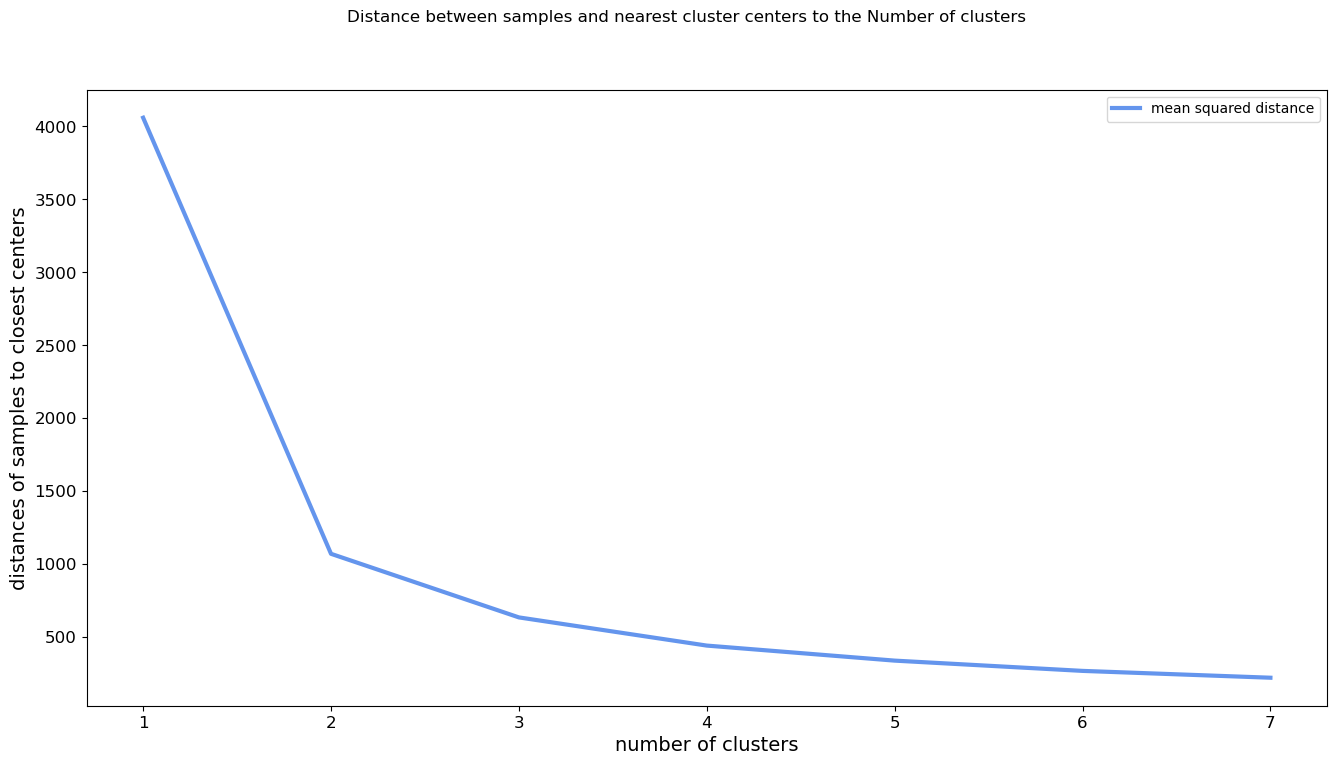

In [80]:
clusters = []
losses = []

for i in range(7):
    model = KMeans(n_clusters=i+1, random_state=1)
    model.fit(customer_dummies[['TotalPurchases', 'TotalRevenue' ]])
    clusters.append(i+1)
    losses.append(model.inertia_)

fig = plt.figure(figsize = (16,8))
plt.plot(clusters, losses, label='mean squared distance', color='cornflowerblue', linewidth=3)
plt.xlabel('number of clusters')
plt.ylabel('distances of samples to closest centers')
fig.suptitle('Distance between samples and nearest cluster centers to the Number of clusters')
plt.legend()
plt.show()

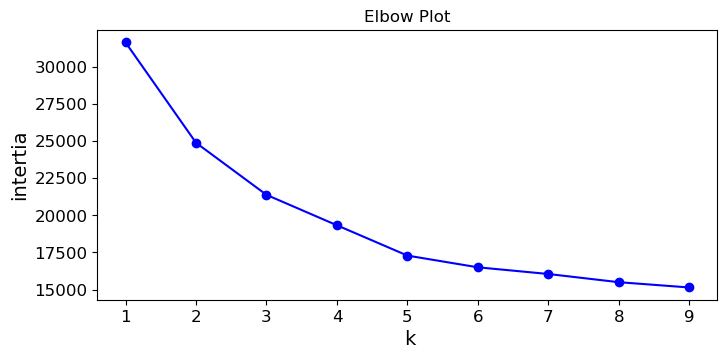

In [75]:
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(customer_dummies)for k in range(1,10)]
inertias =[model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10),inertias,"bo-")
#plt.axis([1,8.5,0,1300])
plt.title('Elbow Plot')
plt.xlabel(' k')
plt.ylabel('intertia')
plt.show()

In [ ]:
## k = 2, there is the elbow


##### Create an empty list to store the within-cluster sum of squares (WSS)
wss = []

##### Try different values of k from 1 to 10
for k in range(1, 11):
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(customer_dummies)
    # Append the WSS to the list
    wss.append(kmeans.inertia_)

#### Plot the WSS against the number of clusters (k)
plt.plot(range(1, 11), wss)
plt.scatter(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()


### 1.5.2 clustering with k=2

In [81]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42) # set random_state for reproducablity
y_pred = kmeans.fit_predict(customer_dummies)

In [82]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [83]:
y_pred is kmeans.labels_

True

In [84]:
kmeans.cluster_centers_

array([[ 1.00570671e+00,  1.98104395e-02,  2.19307598e-01,
         1.11264226e+00,  1.06071947e+00, -3.12887165e-01,
         8.70237428e-01, -5.28911220e-01, -6.18219621e-01,
         8.10227290e-03,  2.95432552e-01,  1.84953426e-01,
        -1.65026922e-01,  7.19041278e-02, -4.16333634e-17,
         4.72703063e-01,  1.75765646e-01,  2.79627164e-01,
         1.18508655e-01,  3.68841545e-01,  2.06391478e-01,
         2.66311585e-01,  3.99467377e-02,  2.32889481e+00],
       [-5.90528332e-01, -1.16322440e-02, -1.28772483e-01,
        -6.53318480e-01, -6.22830586e-01,  1.83720298e-01,
        -5.10983822e-01,  3.10564759e-01,  3.63004640e-01,
        -4.75747221e-03, -1.73471342e-01, -1.08600487e-01,
         9.69000928e-02,  9.85144644e-02,  4.22204848e-02,
         5.01954652e-01,  1.67318217e-01,  1.89992181e-01,
         9.85144644e-02,  4.01876466e-01,  2.11884285e-01,
         2.59577795e-01,  2.81469898e-02,  1.11571540e+00]])

In [85]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 1])

In [86]:
# Choose the optimal number of clusters based on the plot
optimal_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(customer_dummies)

# Add the cluster labels to the original DataFrame
customer_dummies['Cluster'] = clusters

# Analyze and visualize the clustering results
customer_dummies.groupby('Cluster').mean()


Estimated_Income   Recency       Age  TotalRevenue  TotalPurchases  \
Cluster                                                                       
0                1.005375  0.020361  0.218347      1.114100        1.061204   
1               -0.589087 -0.011930 -0.127938     -0.652793       -0.621799   

         WebEngagement  CatalogEngagement  StoreEngagement  TotalChildren  \
Cluster                                                                     
0            -0.312871           0.871771        -0.530298      -0.619082   
1             0.183323          -0.510804         0.310721       0.362744   

         ComplaintsLastYear  ...  Education_2n Cycle  Education_Basic  \
Cluster                      ...                                        
0                  0.008246  ...            0.070667         0.000000   
1                 -0.004832  ...            0.099219         0.042188   

         Education_Graduation  Education_Master  Education_PhD  \
Cluster                                                          
0                    0.473333          0.176000       0.280000   
1                    0.501563          0.167187       0.189844   

         Marital_Status_Divorced  Marital_Status_Married  \
Cluster                                                    
0                       0.118667                0.369333   
1                       0.098437                0.401562   

         Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  
Cluster                                                                        
0                     0.205333                 0.266667              0.040000  
1                     0.212500                 0.259375              0.028125  

[2 rows x 23 columns]

In [88]:
print(customer_dummies.shape)

(2030, 24)


In [92]:
customer_dummies.sort_values('Cluster')

Estimated_Income   Recency       Age  TotalRevenue  TotalPurchases  \
0             0.399837  0.300110  1.025438      1.846854        1.401274   
1071          1.024739 -0.913275  0.253349      1.604092        0.978769   
1072          0.488640  1.166814  1.197014      0.371205        1.119604   
1076          1.842603 -0.774603 -1.033468      1.293703        1.682944   
1080          0.805141  0.646792  0.339136      0.719743       -0.007076   
...                ...       ...       ...           ...             ...   
393           0.045718  1.270818  1.969103     -0.594643       -0.429582   
1189         -0.208616 -1.190620 -0.432953     -0.868617       -1.133757   
1188         -0.924061 -0.947943  0.596500     -0.688279       -0.570417   
1200          0.234406 -1.710643 -0.690317     -0.655333       -0.570417   
2239          0.138000 -0.323917  1.282801     -0.658801       -0.570417   

      WebEngagement  CatalogEngagement  StoreEngagement  TotalChildren  \
0          0.266563           2.280647        -2.254659      -1.328439   
1071      -0.588781           1.225907        -0.626763       0.028748   
1072       1.001751          -0.414396        -0.429788       0.028748   
1076      -0.700790           1.042539        -0.373083      -1.328439   
1080       0.008602           0.725814        -0.656608      -1.328439   
...             ...                ...              ...            ...   
393        0.954458          -0.329936        -0.467591      -1.328439   
1189      -0.700790          -1.174537         1.611593       1.385935   
1188       0.363298          -0.224361        -0.089558       0.028748   
1200      -0.700790          -0.224361         0.761017       1.385935   
2239       0.363298          -0.224361        -0.089558       1.385935   

      ComplaintsLastYear  ...  Education_Basic  Education_Graduation  \
0              -0.099751  ...                0                     1   
1071           -0.099751  ...                0                     1   
1072           -0.099751  ...                0                     1   
1076           -0.099751  ...                0                     0   
1080           -0.099751  ...                0                     1   
...                  ...  ...              ...                   ...   
393            -0.099751  ...                0                     0   
1189           -0.099751  ...                0                     0   
1188           -0.099751  ...                0                     0   
1200           -0.099751  ...                0                     1   
2239           -0.099751  ...                0                     0   

      Education_Master  Education_PhD  Marital_Status_Divorced  \
0                    0              0                        0   
1071                 0              0                        0   
1072                 0              0                        0   
1076                 0              1                        0   
1080                 0              0                        0   
...                ...            ...                      ...   
393                  0              1                        0   
1189                 0              0                        0   
1188                 0              1                        0   
1200                 0              0                        0   
2239                 0              1                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                          0                      1                        0   
1071                       0                      0                        1   
1072                       0                      0                        1   
1076                       1                      0                        0   
1080                       0                      1                        0   
...                      ...                    ...               

In [93]:
customer_cluster0 = customer_dummies[customer_dummies['Cluster'] == 0]
customer_cluster0 

Estimated_Income   Recency       Age  TotalRevenue  TotalPurchases  \
0             0.399837  0.300110  1.025438      1.846854        1.401274   
2             1.069464 -0.809271  0.339136      0.388546        1.119604   
5             0.617248 -1.155952  0.167561      0.284504        1.119604   
15            1.625391 -0.913275  1.969103      1.323181        1.823779   
18            1.336917  1.444159  1.711740      2.132967        1.682944   
...                ...       ...       ...           ...             ...   
2221          1.276390 -1.294625 -1.119255      1.536465        1.119604   
2224          0.375189 -0.878607 -0.089802      0.220346        0.978769   
2231         -0.262882  0.750796 -0.089802      0.861932        1.823779   
2237          0.342341  1.444159 -1.033468      1.194864        0.837934   
2238          0.951788 -1.433297  1.111226      0.504725        1.260439   

      WebEngagement  CatalogEngagement  StoreEngagement  TotalChildren  \
0          0.266563           2.280647        -2.254659      -1.328439   
2          0.576115          -0.414396        -0.089558      -1.328439   
5         -0.275155           0.345744        -0.089558       0.028748   
15        -0.445409           0.649800        -0.225650      -1.328439   
18         1.072690           0.092364        -0.940133       0.028748   
...             ...                ...              ...            ...   
2221      -1.552061           1.105885         0.250672      -1.328439   
2224       0.307293           1.225907        -1.343037       0.028748   
2231       0.235607           0.041688        -0.225650      -1.328439   
2237      -1.883110           0.092364         1.422576      -1.328439   
2238      -0.396765           0.635321        -0.251572       0.028748   

      ComplaintsLastYear  ...  Education_Basic  Education_Graduation  \
0              -0.099751  ...                0                     1   
2              -0.099751  ...                0                     1   
5              -0.099751  ...                0                     0   
15             -0.099751  ...                0                     0   
18             -0.099751  ...                0                     0   
...                  ...  ...              ...                   ...   
2221           -0.099751  ...                0                     0   
2224           -0.099751  ...                0                     0   
2231           -0.099751  ...                0                     0   
2237           -0.099751  ...                0                     1   
2238           -0.099751  ...                0                     0   

      Education_Master  Education_PhD  Marital_Status_Divorced  \
0                    0              0                        0   
2                    0              0                        0   
5                    1              0                        0   
15                   0              1                        0   
18                   1              0                        0   
...                ...            ...                      ...   
2221                 1              0                        0   
2224                 0              1                        0   
2231                 1              0                        0   
2237                 0              0                        1   
2238                 1              0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                          0                      1                        0   
2                          0                      0                        1   
5                          0                      0                        1   
15                         0                      1                        0   
18                         1                      0                        0   
...                      ...                    ...               

In [104]:
customer_selected.head()

Education Marital_Status  Estimated_Income  Recency  Age  TotalRevenue  \
0  Graduation         Single           58138.0       58   66          1617   
1  Graduation         Single           46344.0       38   69            27   
2  Graduation       Together           71613.0       26   58           776   
3  Graduation       Together           26646.0       26   39            53   
4         PhD        Married           58293.0       94   42           422   

   TotalPurchases  WebEngagement  CatalogEngagement  StoreEngagement  \
0              22       0.363636           0.454545         0.181818   
1               4       0.250000           0.250000         0.500000   
2              20       0.400000           0.100000         0.500000   
3               6       0.333333           0.000000         0.666667   
4              14       0.357143           0.214286         0.428571   

   TotalChildren  ComplaintsLastYear  WineRatio  MeatRatio  FishRatio  
0              0                   0   0.392703   0.337662   0.106370  
1              2                   0   0.407407   0.222222   0.074074  
2              0                   0   0.548969   0.163660   0.143041  
3              1                   0   0.207547   0.377358   0.188679  
4              1                   0   0.409953   0.279621   0.109005

In [ ]:
customer_cluster0_org = customer_selected[customer_selected[''] == 0]

In [89]:
customer_selected.head()

Education Marital_Status  Estimated_Income  Recency  Age  TotalRevenue  \
0  Graduation         Single           58138.0       58   66          1617   
1  Graduation         Single           46344.0       38   69            27   
2  Graduation       Together           71613.0       26   58           776   
3  Graduation       Together           26646.0       26   39            53   
4         PhD        Married           58293.0       94   42           422   

   TotalPurchases  WebEngagement  CatalogEngagement  StoreEngagement  \
0              22       0.363636           0.454545         0.181818   
1               4       0.250000           0.250000         0.500000   
2              20       0.400000           0.100000         0.500000   
3               6       0.333333           0.000000         0.666667   
4              14       0.357143           0.214286         0.428571   

   TotalChildren  ComplaintsLastYear  WineRatio  MeatRatio  FishRatio  
0              0                   0   0.392703   0.337662   0.106370  
1              2                   0   0.407407   0.222222   0.074074  
2              0                   0   0.548969   0.163660   0.143041  
3              1                   0   0.207547   0.377358   0.188679  
4              1                   0   0.409953   0.279621   0.109005

In [ ]:
## pairplot - features durch iterieren aus dem clustering

#3 Cluster
fig = sns.pairplot(data=data_To_Cluster_Trips[['RENTAL_DURATION_MIN','BOOKING_HOUR', 'CLUSTER']], hue='CLUSTER').set
plt.subplots_adjust(top=0.9)
plt.gcf().suptitle('Trip Cluster Visualization')

In [74]:
def plot_data(customer_dummies):
    plt.plot(customer_dummies["TotalRevenue"], customer_dummies["TotalPurchases"], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = customer_dummies.min(axis=0) - 0.1
    maxs = customer_dummies.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Accent")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(customer_dummies)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("Total Revenue", fontsize=14) 
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Total purchases", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
        
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, customer_dummies)
plt.show()

C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KMeans is expecting 23 features as input.

<Figure size 800x400 with 0 Axes>

## Performing k-means clustering

**Fit and predict**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42) # set random_state for reproducablity
y_pred = kmeans.fit_predict(customer_dummies)

Each instance was assigned to one of the 5 clusters:

In [ ]:
y_pred

In [ ]:
y_pred is kmeans.labels_

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

Plot cluster results

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [ ]:
def plot_data(customer_dummies):
    plt.plot(customer_dummies["TotalRevenue"], customer_dummies["TotalPurchases"], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = customer_dummies.min(axis=0) - 0.1
    maxs = customer_dummies.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Accent")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(customer_dummies)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("Revenue per customer", fontsize=14) 
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Total Purchases", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, customer)
save_fig("voronoi_plot")
plt.show()

In [ ]:
import seaborn as sns
diverging_colors = sns.color_palette("Blues")

sns.pairplot(x_vars=['Revenue'], y_vars=['Time spend in app'], data=temp, hue="Cluster", height=5, palette=sns.color_palette('tab10', n_colors=5))


Of course, we can predict the labels of new instances:

In [ ]:
Customer_new = np.array([[0, 2], [-0.5, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(Customer_new)

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [ ]:
kmeans.transform(Customer_new)

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, customer, title1=None, title2=None):
    clusterer1.fit(customer)
    clusterer2.fit(customer)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, customer)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, customer, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=3)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, customer,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure and thinertias of the "good" model we chose above:

In [ ]:
kmeans_rnd_init1.inertia_

In [ ]:
kmeans_rnd_init2.inertia_

In [ ]:
kmeans.inertia_

# Finding the right number of clusters

## Heatmap

In [ ]:
kmeans.cluster_centers_

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(kmeans.cluster_centers_)

scaledClusterCenteres = scaler.transform(kmeans.cluster_centers_)
scaledClusterCenteres

In [ ]:
import seaborn as sns
x_labels = ["Revenue per customer","Time spend in app"]
y_labels = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3", "Cluster 4"]
sns.heatmap(scaledClusterCenteres, fmt='.2f', cmap='RdYlGn', xticklabels=x_labels, yticklabels=y_labels)

## Elbow plot

No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(customer) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(customer, kmeans.labels_)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(customer)for k in range(1, 10)]
silhouette_scores = [silhouette_score(customer, model.labels_) for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

## Silhouette diagram

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(customer)for k in range(1, 10)]

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(customer, y_pred)

    padding = len(customer) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()